<a href="https://colab.research.google.com/github/bakrilawzi/CV/blob/main/LRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# Plotting.
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_formats = ['svg']

## Fitting a linear regression model with Gradient Descent.

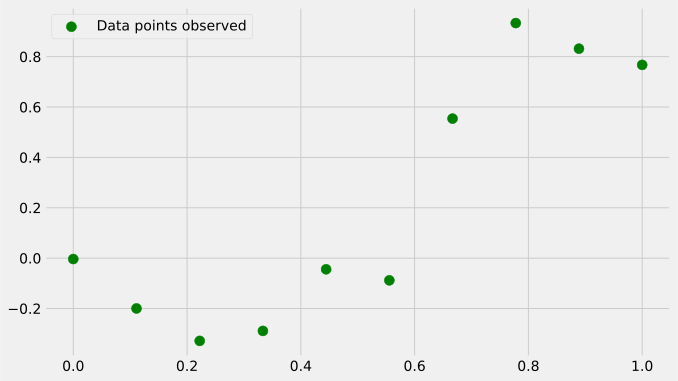

In [ ]:
#@title We generate datapoints from a polynomial function.
n_points = 10
noise_magnitude = 0.2

x = np.linspace(0.0, 1.0, n_points)
x.sort()

y_real = 1.5 * x ** 1.8 - 0.3

# We add some artificial noise, as it is quite common to train on noisy data.
#y = y_real

y = y_real + noise_magnitude * np.random.normal(size=n_points)

#plt.plot(x, y_real, '--', label='Real function')
plt.scatter(x, y, s=100, c='g', label='Data points observed')
_ = plt.legend(loc='best')

In [ ]:
#@title Defining our linear model, its cost function, and a way to display its predictions.
def linear_regression(x, w, b):
  return x * w + b

def mean_squared_error(y, y_pred):
  return ((y - y_pred)**2).mean() / 2.0

def plot_linear_regression(x, y, y_pred):
  plt.ylim((-2.0, 2.0))
  error = y - y_pred
  mse = mean_squared_error(y, y_pred).round(2)
  plt.fill_between(x, y, y_pred, color='r', alpha=0.25, label=f'Error (MSE = {mse})')
  plt.bar(x, error, width=0.205, bottom=y_pred, color='red', alpha=0.25)
  plt.scatter(x, y, s=100, c='g', label='Data point')
  plt.rcParams['figure.figsize'] = (10, 6)
  %config InlineBackend.figure_formats = ['svg']
  plt.plot(x, y_pred, '--', label='Linear regression')
  _ = plt.legend(loc='best')

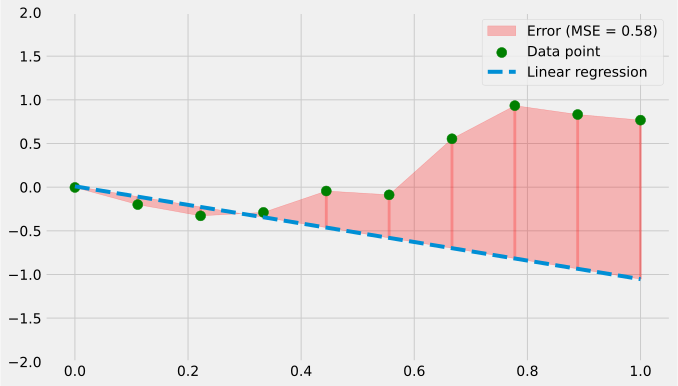

In [ ]:
#@title Initializing weights randomly.
w_0 = np.random.normal()
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_formats = ['svg']
b_0 = np.random.normal()

# Display the initial model.
y_pred = linear_regression(x, w_0, b_0)
plot_linear_regression(x, y, y_pred)

In [ ]:
def gradient_descent(x, y, w_0, b_0, learning_rate, iterations=10):
  weights = [(w_0, b_0)]
  errors = []
  for i in range(iterations):
    w, b = weights[-1]
    # We calculate the model's prediction / error with the latest weights.
    y_pred = linear_regression(x, w, b)
    error = mean_squared_error(y, y_pred)
    # We update the weights based on the error at this step.
    w = w - learning_rate * np.dot(x, y_pred - y) / len(x)
    b = b - learning_rate * (y_pred - y).mean()
    # We store the weights/error for later use.
    weights.append((w, b))
    errors.append(error)
  w, b = weights[-1]
  errors.append(mean_squared_error(y, linear_regression(x, w, b)))
  return weights, errors

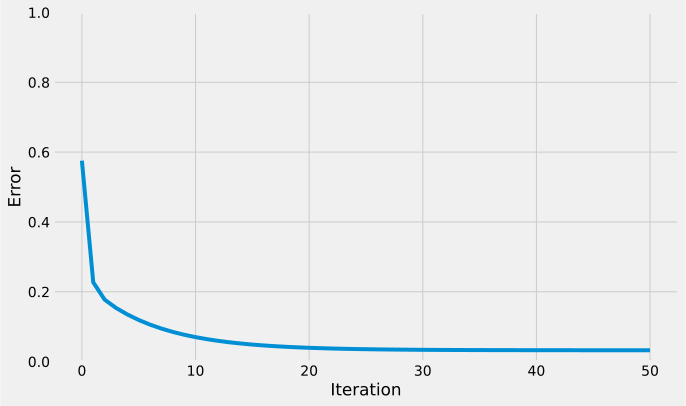

In [ ]:
#@title Visualize the evolution of the error throughout the gradient descent process.
iterations = 50
weights, errors = gradient_descent(x, y, w_0, b_0, learning_rate=1.0, iterations=iterations)
plt.plot(range(iterations + 1), errors)
plt.xlabel("Iteration")
plt.ylabel("Error")
_ = plt.ylim((0, 1.0))

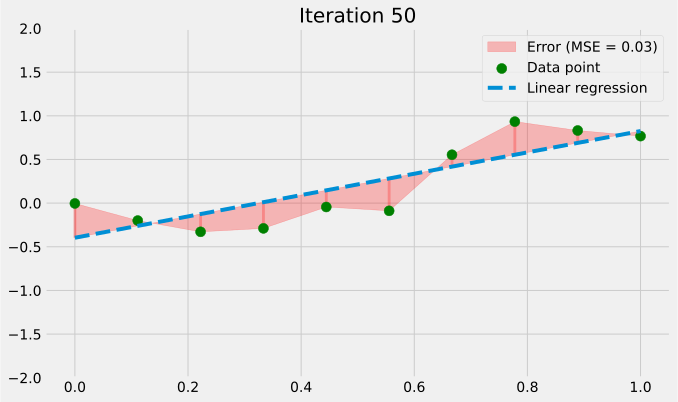

In [ ]:
#@title Visualize the weights at different iterations.
from IPython.display import clear_output
import time

for n_iter, ((w, b), error) in enumerate(zip(weights, errors)):
  clear_output(wait=True)
  y_pred = linear_regression(x, w, b)
  plot_linear_regression(x, y, y_pred)
  plt.title(f"Iteration {n_iter}")
  plt.show()
  time.sleep(2.0 if n_iter < 10 else 0.0)

## Linear Regression on real-world data.

In [ ]:
!wget https://github.com/Harshal2894/-House-Prices-Advanced-Regression-Techniques/raw/master/train.csv

--2023-05-07 13:19:45--  https://github.com/Harshal2894/-House-Prices-Advanced-Regression-Techniques/raw/master/train.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Harshal2894/-House-Prices-Advanced-Regression-Techniques/master/train.csv [following]
--2023-05-07 13:19:45--  https://raw.githubusercontent.com/Harshal2894/-House-Prices-Advanced-Regression-Techniques/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460676 (450K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>] 449.88K  --.-KB/s    in 0.04s   

2023-05-07 13:19:46 (12.1 MB/s) -

In [ ]:
df = pd.read_csv('train.csv')
df.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1140,1141,20,RL,60.0,7350,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,COD,Abnorml,139000
99,100,20,RL,77.0,9320,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,400,1,2010,WD,Normal,128950
813,814,20,RL,75.0,9750,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,500,4,2007,COD,Normal,157900
1139,1140,30,RL,98.0,8731,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,144000
59,60,20,RL,60.0,7200,Pave,NaN,Reg,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,1,2008,WD,Normal,124900


<Axes: ylabel='Frequency'>

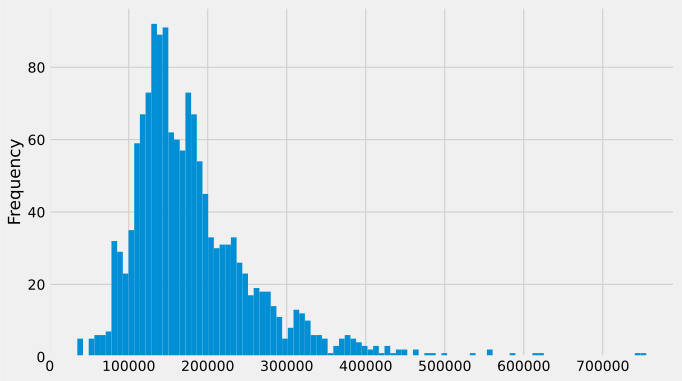

In [ ]:
df.SalePrice.plot.hist(bins=100)

<Axes: ylabel='Frequency'>

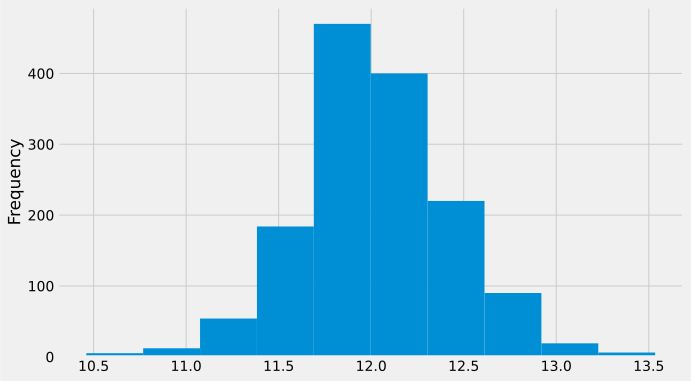

In [ ]:
target = np.log(df['SalePrice'])
target.plot.hist()

In [ ]:
numeric_features = df[['OverallQual', 'GrLivArea']]
numeric_features.sample(5)

,OverallQual,GrLivArea
855,5,1040
1243,10,2076
1026,5,1264
135,7,1682
232,6,987


In [ ]:
categorical_features = df[['MSZoning', 'Neighborhood']]
categorical_features.head()

,MSZoning,Neighborhood
0,RL,CollgCr
1,RL,Veenker
2,RL,CollgCr
3,RL,Crawfor
4,RL,NoRidge


In [ ]:
features = pd.concat([numeric_features, pd.get_dummies(categorical_features)], axis=1)
features = (features - features.mean()) / features.std()
features.head()

,OverallQual,GrLivArea,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0.651256,0.370207,-0.083017,-0.215785,-0.105227,0.517956,-0.418812,-0.108503,-0.037024,-0.105227,...,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099
1,-0.071812,-0.482347,-0.083017,-0.215785,-0.105227,0.517956,-0.418812,-0.108503,-0.037024,-0.105227,...,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,11.473319
2,0.651256,0.514836,-0.083017,-0.215785,-0.105227,0.517956,-0.418812,-0.108503,-0.037024,-0.105227,...,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099
3,0.651256,0.383528,-0.083017,-0.215785,-0.105227,0.517956,-0.418812,-0.108503,-0.037024,-0.105227,...,-0.169923,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099
4,1.374324,1.298881,-0.083017,-0.215785,-0.105227,0.517956,-0.418812,-0.108503,-0.037024,-0.105227,...,5.880991,-0.235877,-0.289539,-0.131946,-0.230986,-0.205144,-0.250096,-0.131946,-0.163415,-0.087099


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, random_state=0)

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

baseline = DummyRegressor()
baseline.fit(x_train, y_train)
mean_squared_error(y_test, baseline.predict(x_test))

0.14877147033553434

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
mean_squared_error(y_test, model.predict(x_test))

0.030541267334850977

In [ ]:
model.predict(x_test)

array([12.39787765, 12.02312179, 11.69304367, 12.44890304, 11.55339523,
       11.52306076, 12.41878219, 11.66911789, 13.4998674 , 12.08357712,
       12.15584274, 11.9866838 , 12.30949875, 11.71623703, 11.87981125,
       11.83586593, 12.4295549 , 11.73161789, 11.80650802, 11.97716232,
       11.85637375, 11.86198898, 11.39665695, 12.05339523, 12.15416427,
       12.06383224, 12.1099443 , 11.30266281, 12.27019211, 11.80754562,
       11.96941086, 12.21910568, 11.86320968, 12.61998459, 12.61482712,
       12.15422531, 12.58971115, 11.81120773, 12.37068649, 12.74254318,
       12.07024093, 11.8491716 , 12.15691086, 12.55821701, 12.79210373,
       11.95549484, 11.46617599, 11.8146257 , 12.04893966, 11.49382492,
       12.90953537, 11.76628586, 11.99767013, 11.46208664, 12.18126388,
       11.59734054, 11.64146896, 12.36784836, 11.7757463 , 11.45567795,
       11.87175461, 11.75896164, 11.813405  , 11.789113  , 12.0804338 ,
       11.99419113, 11.72429367, 12.33235641, 11.92155929, 12.23

In [ ]:
y_test

529     12.209188
491     11.798104
459     11.608236
279     12.165251
655     11.385092
          ...    
583     12.691580
1245    12.089539
1390    12.367341
1375    12.384219
638     11.350407
Name: SalePrice, Length: 365, dtype: float64

In [ ]:
len(features.columns)

32

In [ ]:
len(model.coef_)

32

In [ ]:
model.coef_

array([ 1.53427087e-01,  1.51789577e-01, -4.48354354e+11, -1.12119505e+12,
       -5.65953798e+11, -2.22051797e+12, -1.93743185e+12,  1.75371668e+11,
        6.04638177e+10,  1.70194450e+11,  3.19293303e+11,  2.24208633e+11,
        4.96344351e+11,  3.00152794e+11,  4.12925078e+11,  3.69838561e+11,
        2.56924262e+11,  1.75371668e+11,  2.94417318e+11,  5.90237154e+11,
        1.27954854e+11,  3.56288222e+11,  2.70075340e+11,  3.65391347e+11,
        4.36842441e+11,  2.12079046e+11,  3.58590914e+11,  3.21919200e+11,
        3.84896886e+11,  2.12079046e+11,  2.60281561e+11,  1.41361889e+11])